**Movie Recommendation**

GroupLens Research has collected and made available rating data sets from the MovieLens web site (http://movielens.org). The data sets were collected over various periods of time, depending on the size of the set.

**Types of recommendation system**
1. **Popularity Based:**
It keeps a track of view counts for each movie/video and then lists movies based on views in descending order.

2. **Content Based:**
This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.

3. **Collaborative filtering:**
In other words, the recommendations get filtered based on the collaboration between similar user’s preferences.

In this project I'm are going to implement content based recommendation system.

In [4]:
#importing libs
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

**Loading Dataset**


* The movies.csv dataset contains three columns:

1.   **movieId**: the ID of the movie.
2.   **title:** movies title
3.  **genres:** movies genres

* The ratings.csv dataset contains four columns:

1. **userId:** the ID of the user who rated the movie.
2. **movieId:** the ID of the movie
3. **ratings:** ratings given by each user (from 0 to 5)
4. **Timstamp:** The time the movie was rated.













In [5]:
movies = pd.read_csv('/movies.csv')
ratings = pd.read_csv('/ratings.csv')

**EDA : Exploratory Data Aanlysis**

In [6]:
#getting info on types of cols in movies dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [7]:
#getting info on types of cols in ratings dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [15]:
 movies.shape

(10329, 3)

In [16]:
ratings.shape

(105339, 4)

This indicates that the data consists of 105339 ratings applied over 10329 movies.

In [10]:
#getting statistical info on movies dataframe
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [11]:
#getting statistical info on ratings dataframe
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


From the above table we can conclue that



*   The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively.
*   There are 668 user who has given their ratings for 149532 movies.




In [12]:
genres = []  # Initialize an empty list to store unique genres
for genre in movies.genres:  # Loop through each genre in the 'genres' column of the DataFrame
    x = genre.split('|')  # Split the genre string by the '|' character into a list of genres
    for i in x:  # Loop through each genre in the split list
        if i not in genres:  # Check if the genre is not already in the 'genres' list
            genres.append(str(i))  # If it's not, add it to the list
genres = str(genres)  # Convert the final list of genres to a string

In [13]:
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
    #removing last 7 char. Eg: "The Matrix (1999)", the last 7 characters (" (1999)") are removed.
movie_title=str(movie_title)

**Data Visualization**

In [17]:
wordcloud_genre = WordCloud(
    width=1500,
    height=800,
    background_color='black',
    min_font_size=2,
    min_word_length=3
).generate(genres)

In [18]:
wordcloud_title = WordCloud(
    width=1500,
    height=800,
    background_color='cyan',
    min_font_size=2,
    min_word_length=3
).generate(movie_title)

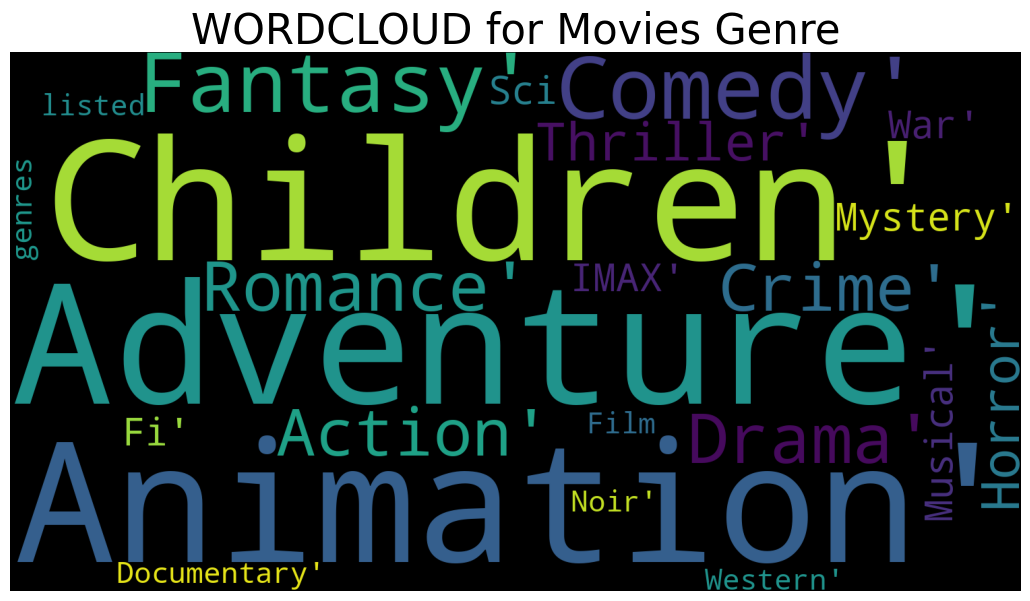

In [20]:
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

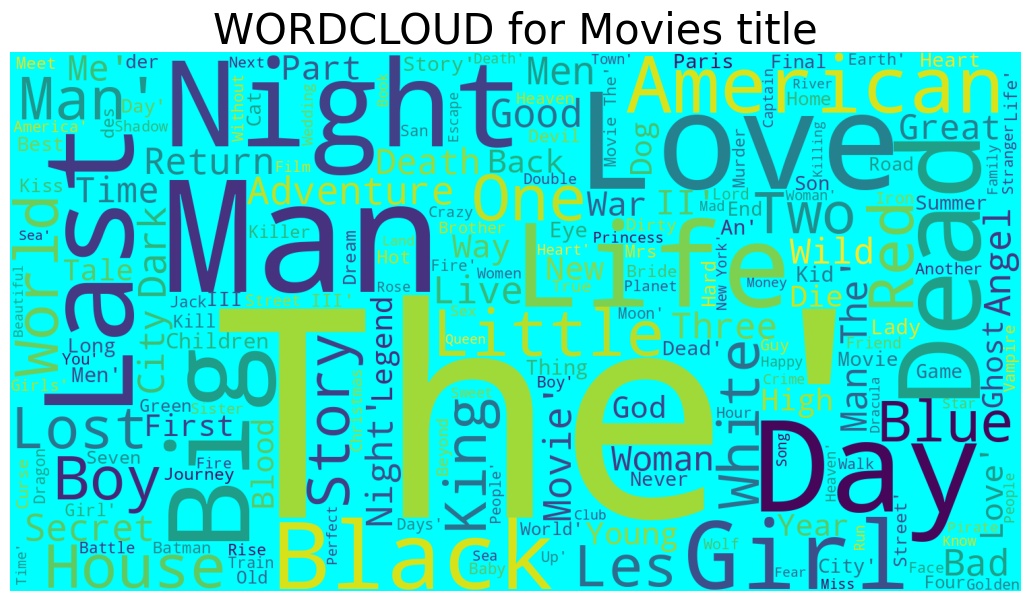

In [22]:
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [25]:
#left join (merge) operation on two DataFrames, ratings and movies based on common movieID
df = pd.merge(ratings, movies, how='left', on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [30]:
#df1: Contains the sum of ratings for each movie, grouped by title.
df1=df.groupby(['title'])[['rating']].sum()
#high_rated: Contains the top 20 movies with the highest total ratings.
high_rated=df1.nlargest(20,'rating')
high_rated.head(10)

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


<BarContainer object of 20 artists>

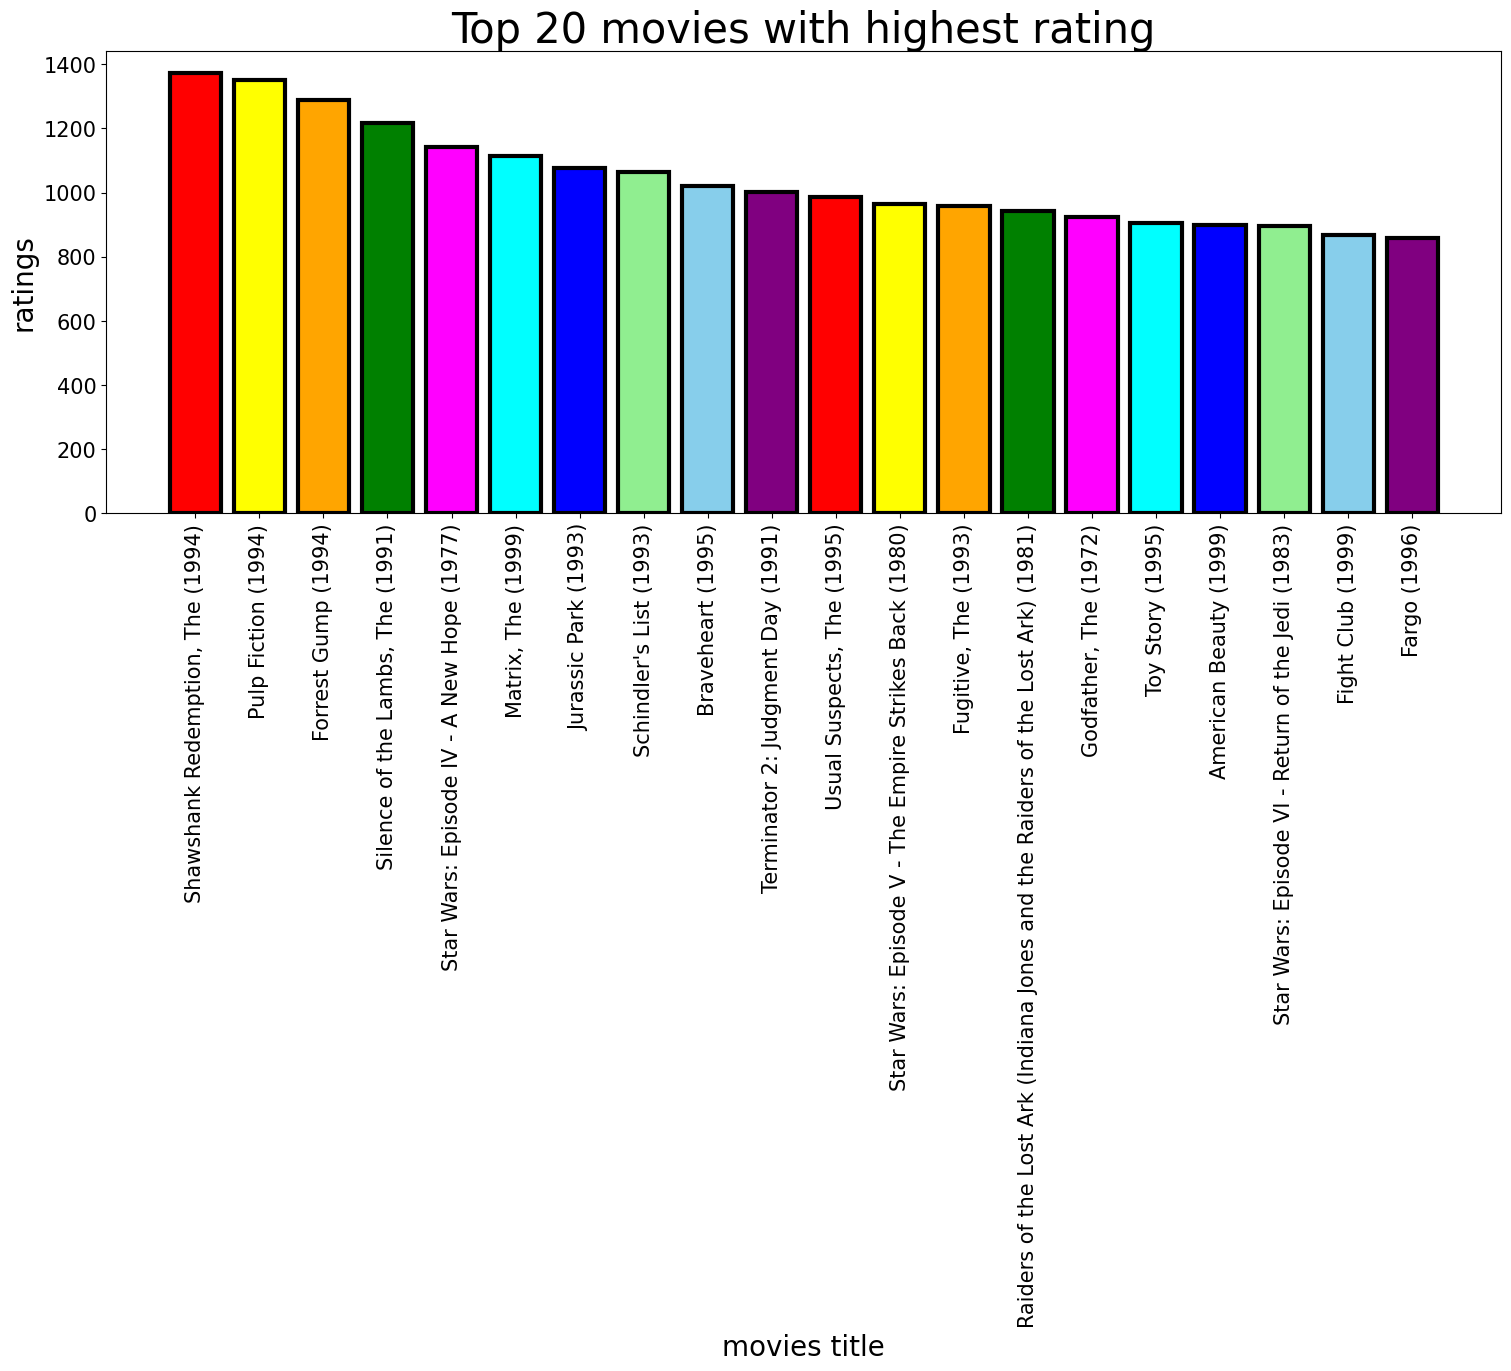

In [37]:
plt.figure(figsize=(18,6))
plt.title('Top 20 movies with highest rating',fontsize=30)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('movies title',fontsize=20)
plt.yticks(fontsize=15)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='black',color=colors)

In [38]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

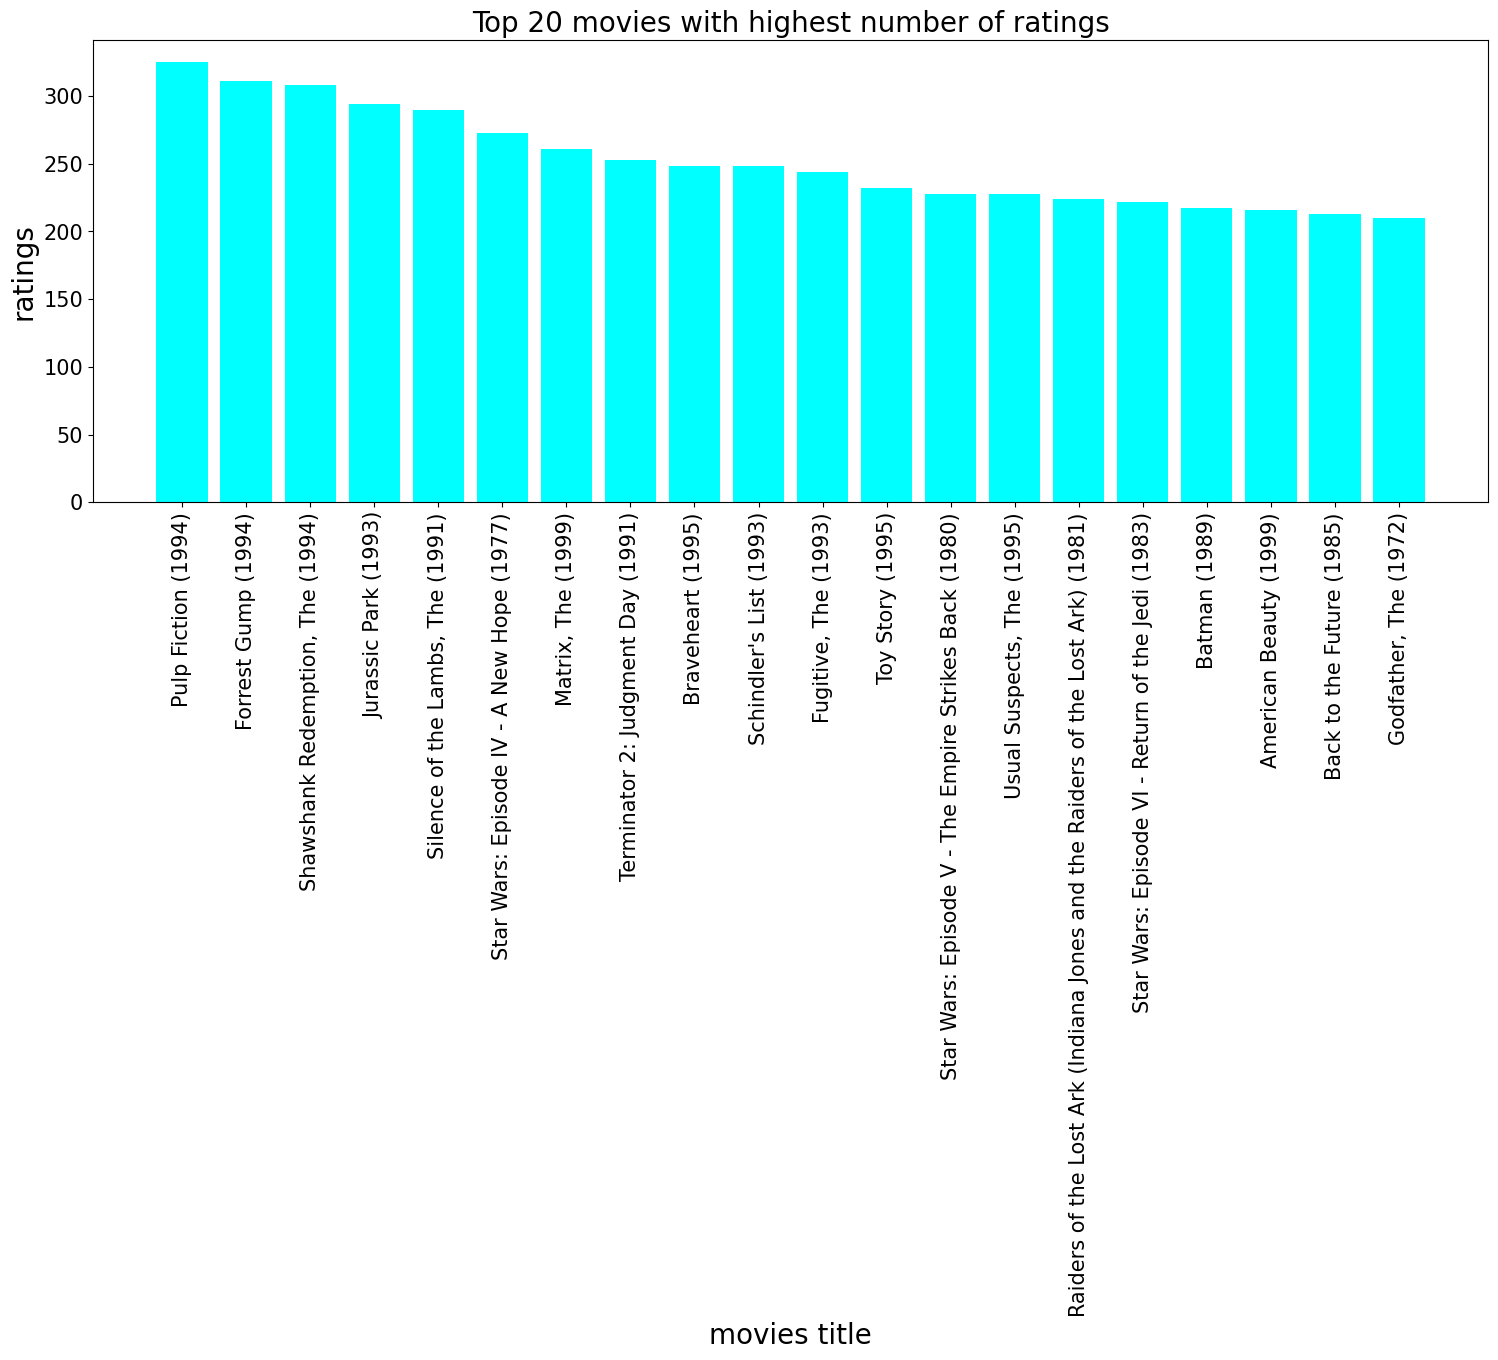

In [39]:
plt.figure(figsize=(18,6))
plt.title('Top 20 movies with highest number of ratings',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('movies title',fontsize=20)
plt.ylabel('ratings',fontsize=20)

plt.bar(rating_count_20.index,rating_count_20.rating,color='cyan')

In [40]:
#TfidfVectorizer: Converts the genres from the movies DataFrame into a numerical format
cv=TfidfVectorizer()
#tfidf_matrix: A sparse matrix representing the TF-IDF scores of genres for each movie
tfidf_matrix=cv.fit_transform(movies['genres'])

In [41]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Suppose a user wants to watch a movie similar to Toy Story (1995) then we can recommend the user by calculating the cosine similarity between Toy Story and other movies.

In [42]:
#cosine similarity measures how much two things (like documents or pieces of text) are aligned with each other
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
#function takes a movie title, finds the most similar movies to it based on cosine similarity, and returns the titles of those similar movies.
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [44]:
recommendations('Toy Story (1995)')

,title
1815,Antz (1998)
2496,Toy Story 2 (1999)
2967,"Adventures of Rocky and Bullwinkle, The (2000)"
3166,"Emperor's New Groove, The (2000)"
3811,"Monsters, Inc. (2001)"
6617,DuckTales: The Movie - Treasure of the Lost La...
6997,"Wild, The (2006)"
7382,Shrek the Third (2007)
7987,"Tale of Despereaux, The (2008)"
9215,Asterix and the Vikings (Astérix et les Viking...


In [46]:
recommendations('Lord of the Rings, The (1978)')

,title
1675,"Lord of the Rings, The (1978)"
2696,We're Back! A Dinosaur's Story (1993)
3420,Atlantis: The Lost Empire (2001)
3535,"Land Before Time, The (1988)"
4314,Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (...
4799,Sinbad: Legend of the Seven Seas (2003)
5539,"Phantom Tollbooth, The (1970)"
6361,"Cat Returns, The (Neko no ongaeshi) (2002)"
6526,Once Upon a Forest (1993)
7978,Ponyo (Gake no ue no Ponyo) (2008)
